## Lakshita Sethi
## 21BDA54
### EDA_ML_LAB02

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style = 'darkgrid')

In [3]:
sns.set(rc={'figure.figsize':(15,12)})

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\hp'

In [6]:
laptop = pd.read_csv("laptop_price.csv",sep=",",encoding='latin-1')

In [54]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [55]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## Cleaning the Data

In [56]:
# We have just three columns which have numerical values.
# To conclude more insights we need to clean the data.
# First, we have to remove 'kg' from the "Weight" column.

In [7]:
laptop.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
laptop['Weight'] = laptop['Weight'].str.replace("kg","").astype("float")

In [9]:
laptop['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [10]:
laptop['Ram'] = laptop['Ram'].str.replace("GB","").astype("int")

In [11]:
laptop["ScreenResolution"] = (laptop["ScreenResolution"].str.split().str[-1])

In [12]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 127.4+ KB


In [90]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [60]:
laptop.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
254,259,Acer,Aspire 5,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,256GB SSD,Nvidia GeForce MX130,Windows 10,3.00,702.00
785,794,MSI,GS43VR 7RE,Gaming,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.60,1891.00
845,855,Dell,Vostro 3568,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,739.00
581,588,Dell,Latitude 5580,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,1008.52
979,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99,1749.00


In [61]:
laptop.shape

(1303, 13)

In [62]:
# So, we have 1303 entries for 13 attributes.

In [63]:
laptop['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [64]:
laptop['Company'].value_counts().count()

19

In [67]:
laptop['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [68]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [69]:
laptop['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [95]:
laptop['ScreenResolution'].value_counts()

1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: ScreenResolution, dtype: int64

In [96]:
laptop['Weight'].mean()

2.038733691481197

In [97]:
laptop['Weight'][laptop['Weight'] > laptop['Weight'].mean()].count()

664

In [98]:
# Out of 1303 entries, 664 have weight greater than the mean weight of the laptops.

In [99]:
laptop['Price_euros'].mean()

1123.6869915579434

In [100]:
laptop.describe()

,laptop_ID,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


In [101]:
laptop.corr()

,laptop_ID,Inches,Ram,Weight,Price_euros
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000


In [102]:
# We can see a very large positive correlation between "Inches" and "Weight".
# That signifies the more the size of the laptop is, the more weight it'll carry.

## Visualizing the Data

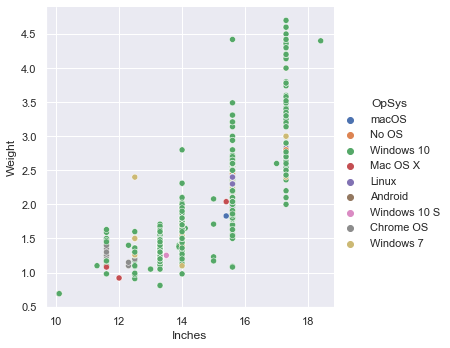

In [103]:
sns.relplot(x = "Inches",y = "Weight", data = laptop,hue = "OpSys",)

<AxesSubplot:xlabel='Inches', ylabel='Weight'>

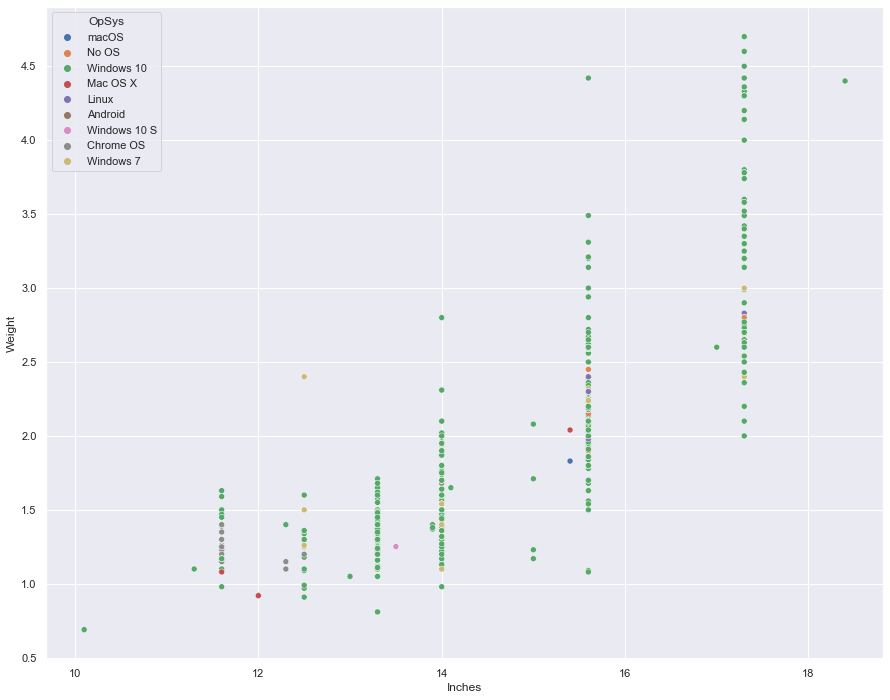

In [104]:
sns.scatterplot(x = "Inches",y = "Weight", data = laptop,hue = "OpSys")

<AxesSubplot:xlabel='Inches', ylabel='Weight'>

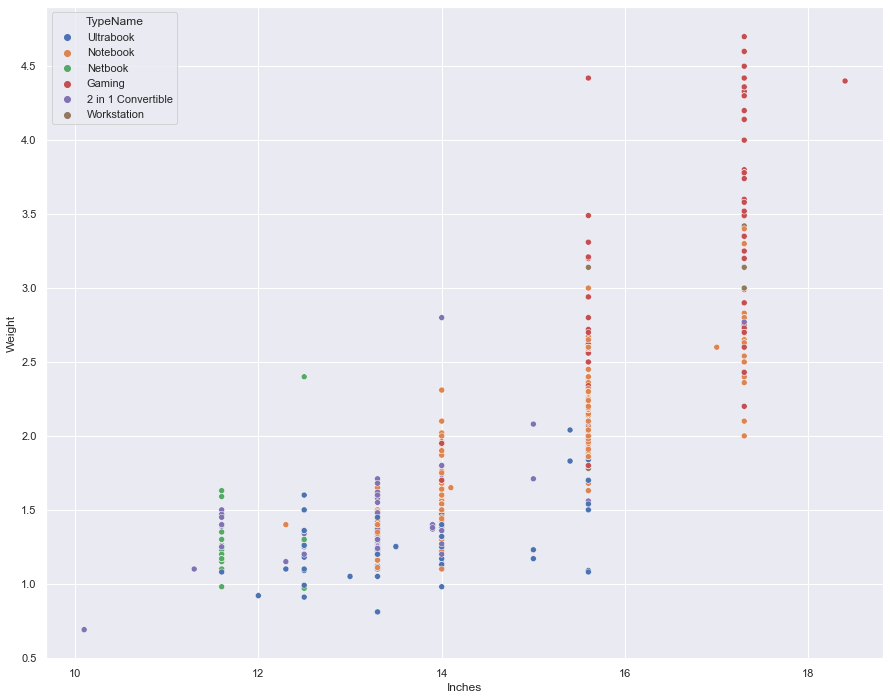

In [105]:
sns.scatterplot(x = "Inches",y = "Weight", data = laptop,hue = "TypeName")

<AxesSubplot:xlabel='ScreenResolution', ylabel='Weight'>

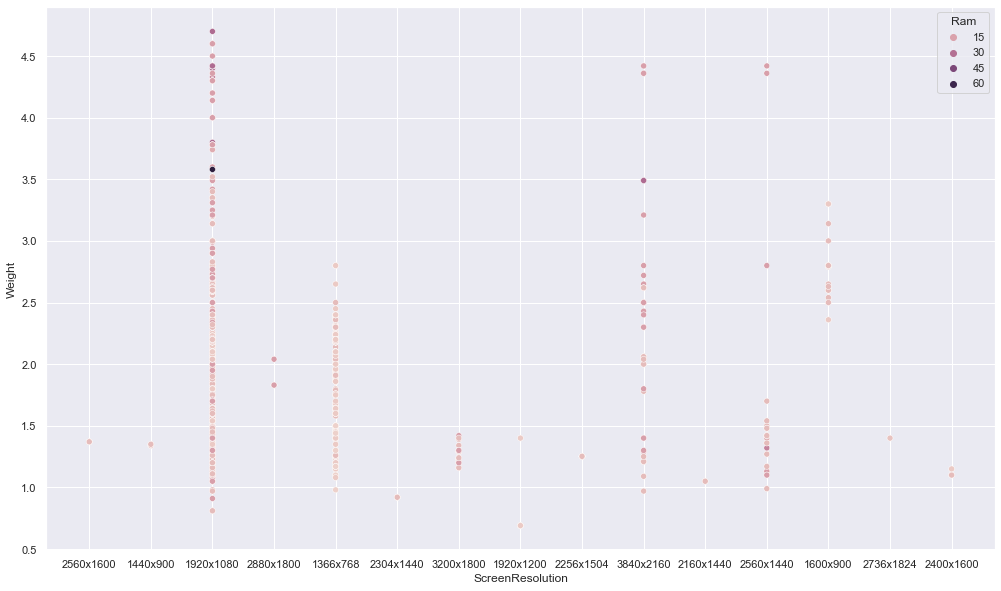

In [112]:
plt.figure(figsize = (17,10))
sns.scatterplot(x = "ScreenResolution",y = "Weight",data = laptop,hue = "Ram")

<AxesSubplot:xlabel='Weight', ylabel='Price_euros'>

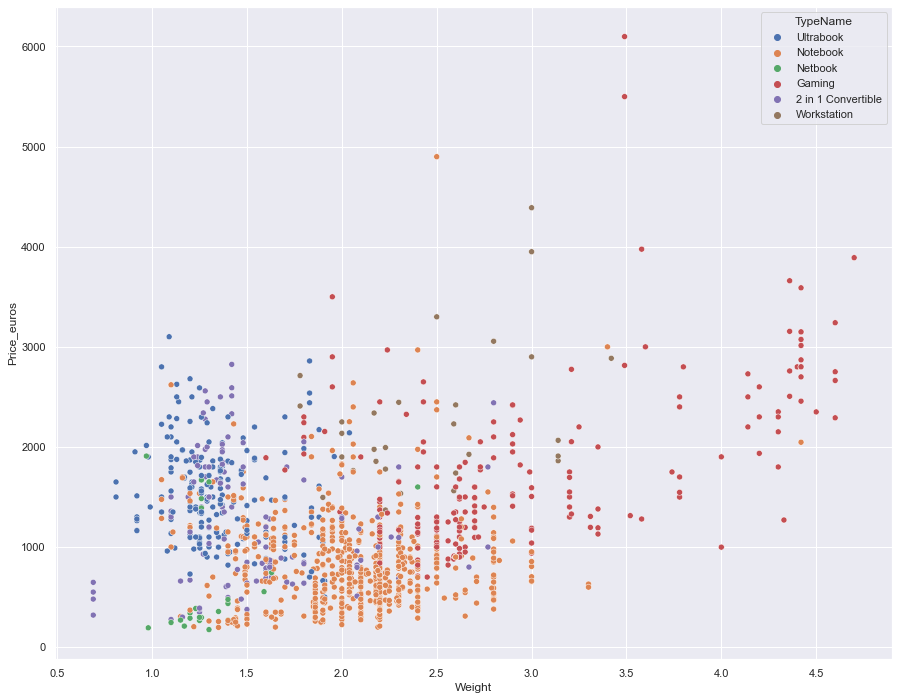

In [132]:
sns.scatterplot(x = laptop.Weight,y = laptop.Price_euros,hue = laptop.TypeName)

In [133]:
# We can see from the above graph that:
# Most of the Ultrabook laptops have less weight and average price.
# Whereas most of the Notebook laptops have little higher weights as compared to Ultrabooks, and have quite low prices.
# Most of the Gaming laptops have higher weights.

<AxesSubplot:xlabel='TypeName', ylabel='Weight'>

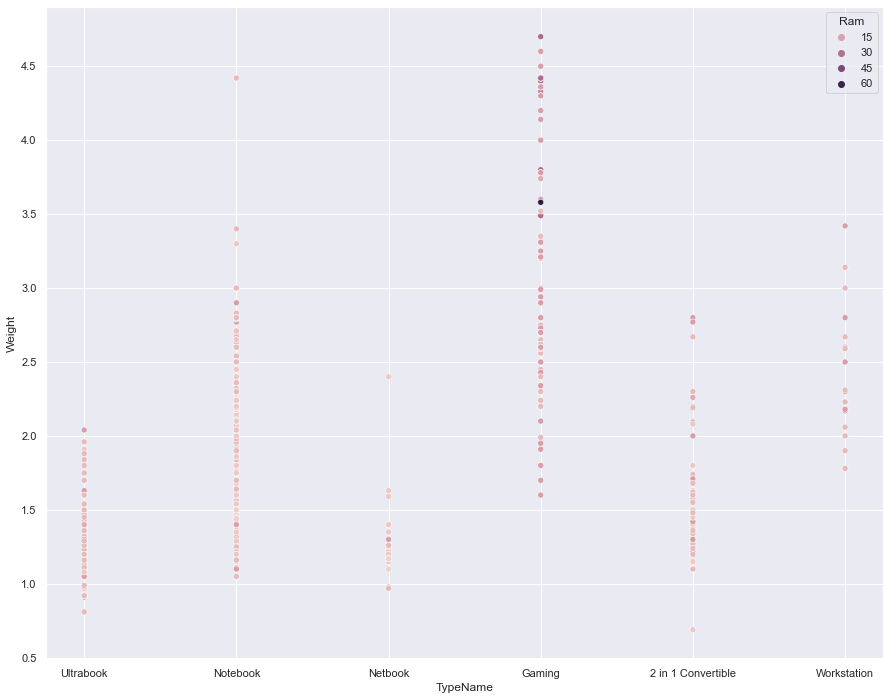

In [146]:
sns.scatterplot(x = laptop.TypeName, y = laptop.Weight,hue = laptop.Ram, data = laptop)

In [135]:
# From this graph, our above insights are more clear.
# Gaming laptops have quite high weights.
# Ultrabook and Netbook laptops weigh the lowest.

<Figure size 1224x864 with 0 Axes>

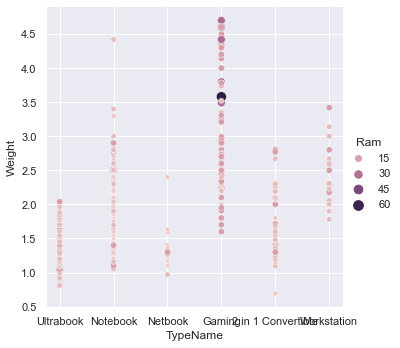

In [152]:
plt.figure(figsize = (17,12))
sns.relplot(x = laptop.TypeName, y = laptop.Weight,hue = "Ram",size = "Ram",sizes = (20,100), data = laptop)

In [13]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 127.4+ KB


In [15]:
laptop.sample(4)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
380,386,HP,Omen 17-w212nv,Gaming,17.3,1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,1191.0
839,848,Asus,R558UA-DM966T (i5-7200U/8GB/128GB/FHD/W10),Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB HDD,Intel HD Graphics 620,Windows 10,2.30,590.0
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1158.7
1042,1056,Toshiba,Tecra A50-C-218,Notebook,15.6,1920x1080,Intel Core i7 6500U 2.5GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.40,1425.0


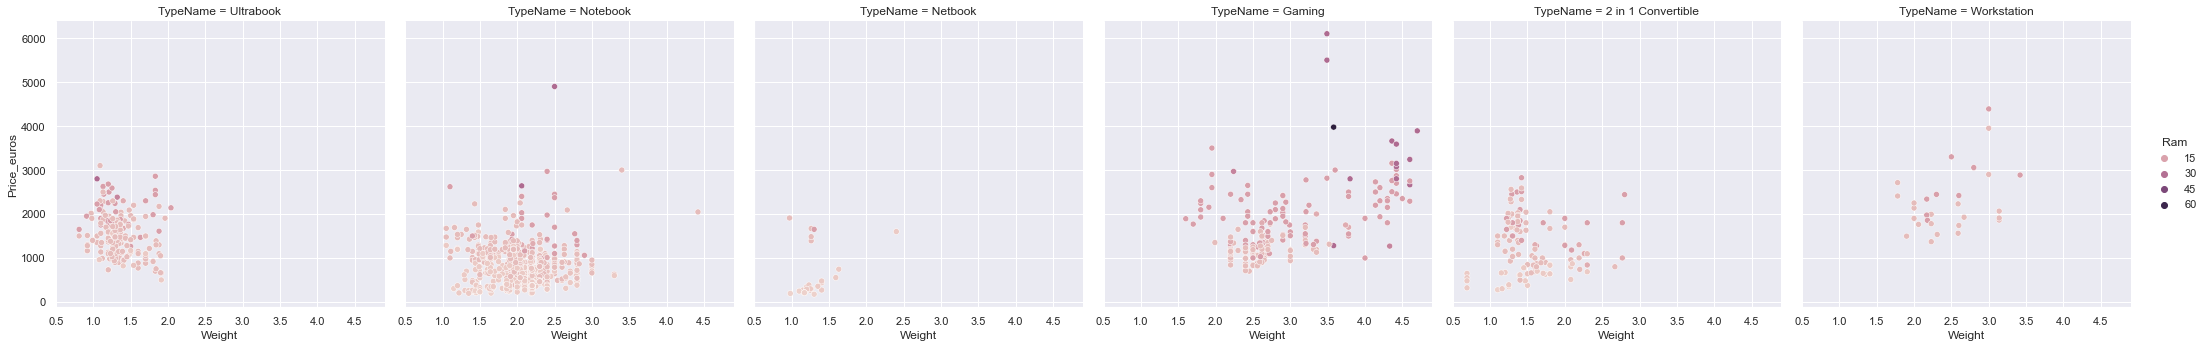

In [57]:
sns.relplot(x = "Weight", y = "Price_euros", hue = "Ram", col = "TypeName", data = laptop);

In [23]:
# From the above graphs,
# We can see that the maximum number of "TypeName" category i.e. "Notebook" laptops, have very less cost specifically of RAM 15.
# And very few of outliers with more cost and higher RAM.
# We can again observe that the "Gaming" laptops have the highest costs and they have maximum number higher RAM laptops as well.

In [25]:
laptop.groupby('Company')['Inches'].mean()

Company
Acer         15.063107
Apple        13.247619
Asus         15.450000
Chuwi        14.500000
Dell         15.136027
Fujitsu      15.600000
Google       12.300000
HP           14.943066
Huawei       13.000000
LG           15.066667
Lenovo       14.872727
MSI          16.442593
Mediacom     13.457143
Microsoft    13.500000
Razer        14.514286
Samsung      13.822222
Toshiba      14.354167
Vero         13.825000
Xiaomi       14.450000
Name: Inches, dtype: float64

In [26]:
laptop.groupby('Company')['Price_euros'].mean()

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [27]:
# It can be observed that the maximum priced laptops are of "Razer" company.

In [29]:
laptop.groupby('Ram')['Price_euros'].mean()

Ram
2      254.370455
4      574.572480
6      615.206341
8     1180.812940
12    1239.438400
16    1936.771150
24    2206.333333
32    3413.085882
64    3975.000000
Name: Price_euros, dtype: float64

In [31]:
laptop.groupby('Ram')['Price_euros'].count()

Ram
2      22
4     375
6      41
8     619
12     25
16    200
24      3
32     17
64      1
Name: Price_euros, dtype: int64

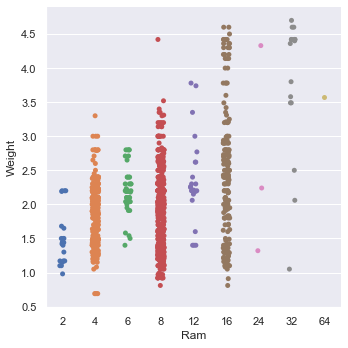

In [30]:
sns.catplot(x = "Ram", y = "Weight", data = laptop);

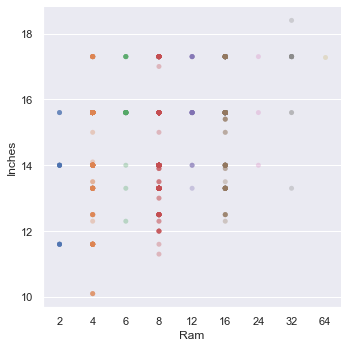

In [35]:
sns.catplot(x = "Ram", y = "Inches",jitter = False,alpha = .33, data = laptop);

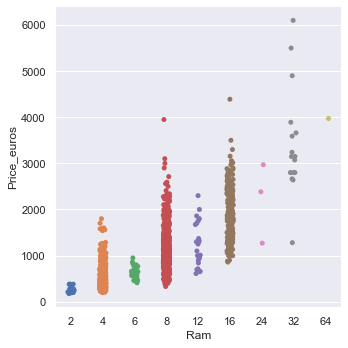

In [36]:
sns.catplot(x = "Ram", y = "Price_euros", data = laptop);

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


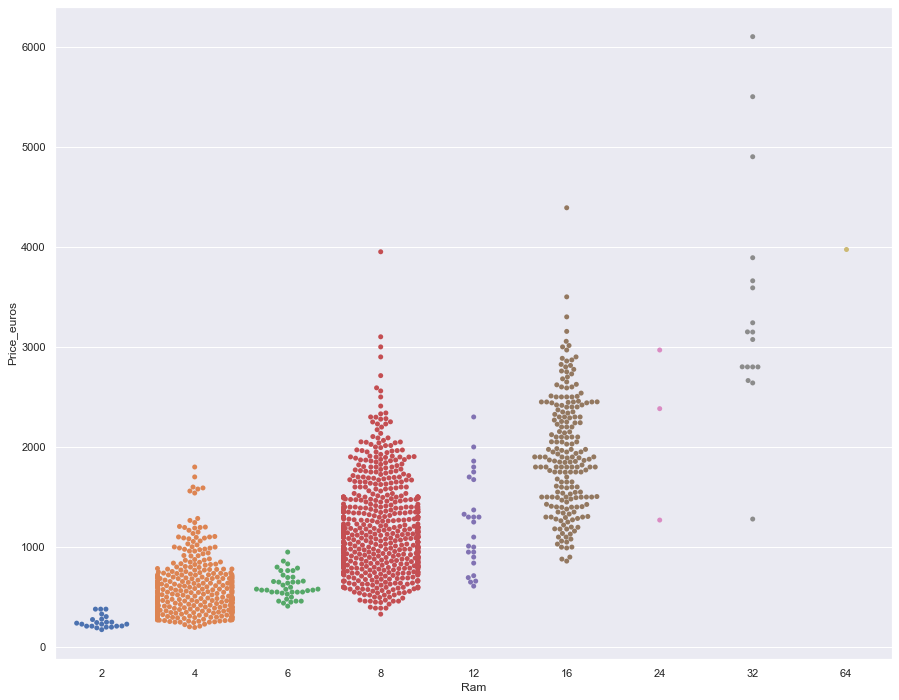

In [37]:
sns.swarmplot(x = "Ram", y = "Price_euros", data = laptop);

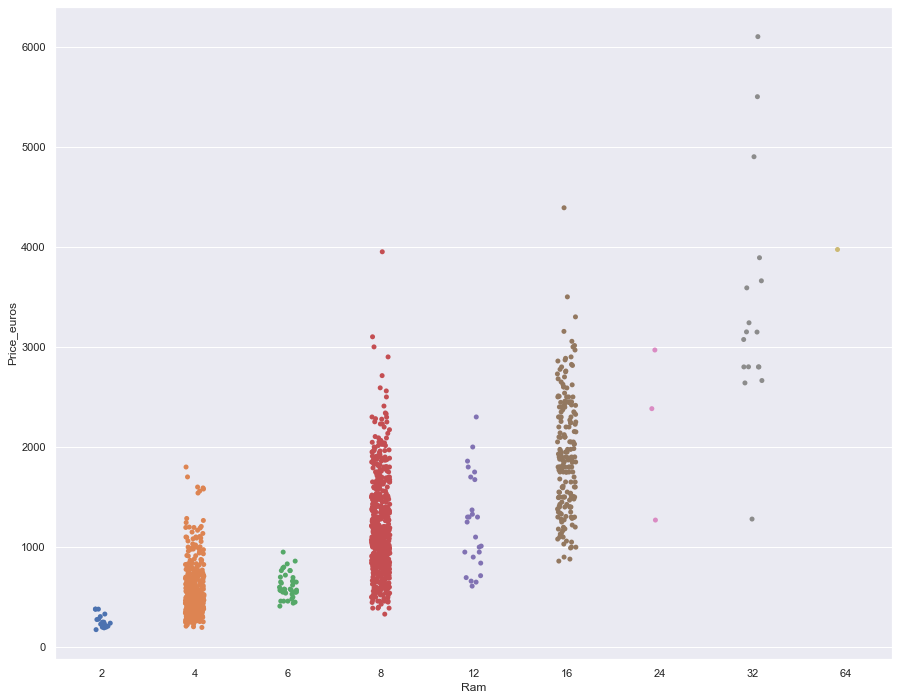

In [41]:
sns.stripplot(x = "Ram", y = "Price_euros", data = laptop);

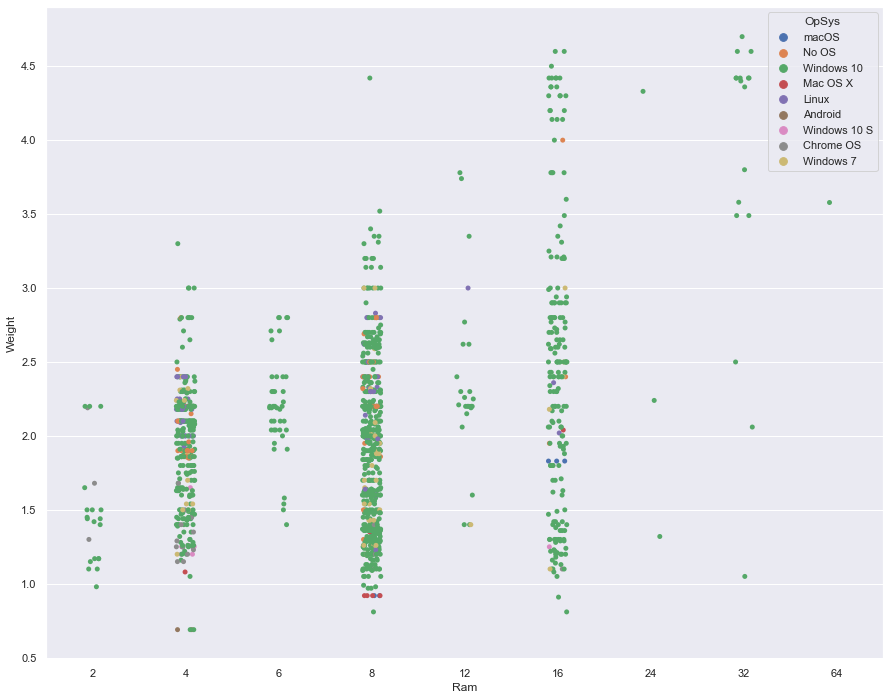

In [40]:
sns.stripplot(x = "Ram", y = "Weight", hue = "OpSys", data = laptop);

In [43]:
laptop.groupby(['Company', 'TypeName'])['Price_euros'].count()

Company    TypeName          
Acer       2 in 1 Convertible      8
           Gaming                  8
           Netbook                 5
           Notebook               78
           Ultrabook               4
Apple      Ultrabook              21
Asus       2 in 1 Convertible     13
           Gaming                 54
           Netbook                 4
           Notebook               67
           Ultrabook              20
Chuwi      Notebook                3
Dell       2 in 1 Convertible     30
           Gaming                 40
           Netbook                 2
           Notebook              165
           Ultrabook              49
           Workstation            11
Fujitsu    Notebook                3
Google     Ultrabook               3
HP         2 in 1 Convertible     19
           Gaming                 12
           Netbook                 9
           Notebook              184
           Ultrabook              36
           Workstation            14
Huawei  

In [44]:
# The maximum number of "Gaming" laptops are being offered by two main companies "Asus" & "MSI".
# Where "MSI" has only Gaming laptops.

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

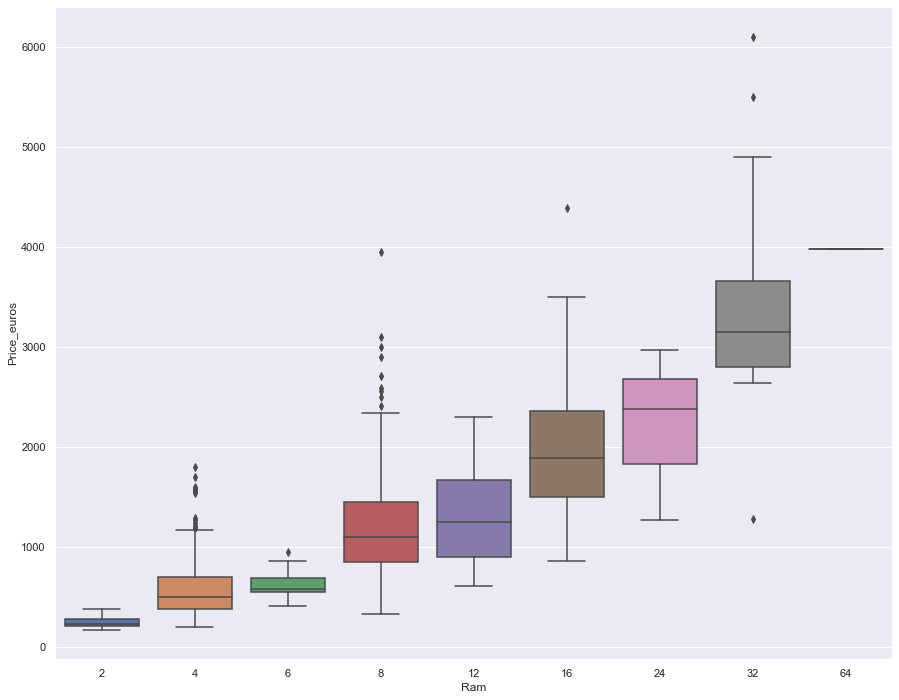

In [45]:
sns.boxplot(x = "Ram", y = "Price_euros", data = laptop)

In [46]:
# There are many outliers in 8GB RAM laptops.
# The most costly ones are the 32GB RAM one's.

<AxesSubplot:xlabel='Ram', ylabel='Inches'>

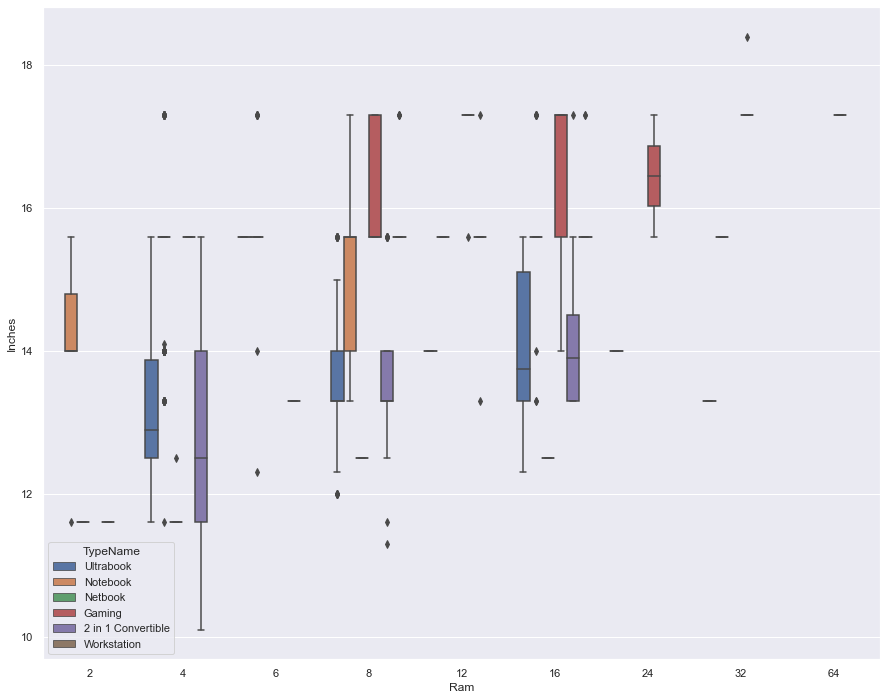

In [48]:
sns.boxplot(x ="Ram", y = "Inches", hue = "TypeName", data = laptop)

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

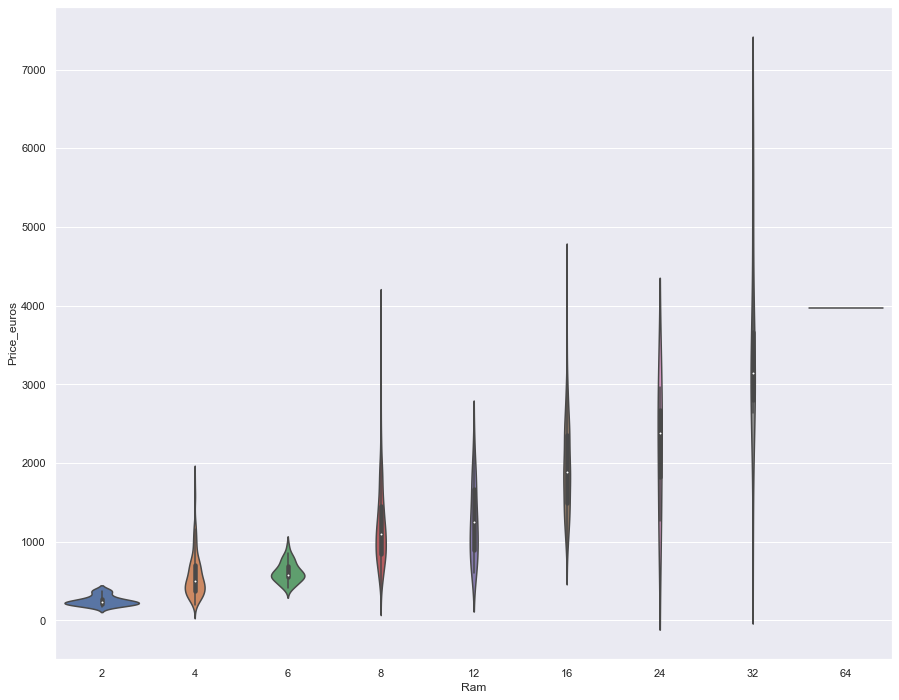

In [49]:
sns.violinplot(x = "Ram", y = "Price_euros", data = laptop)

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

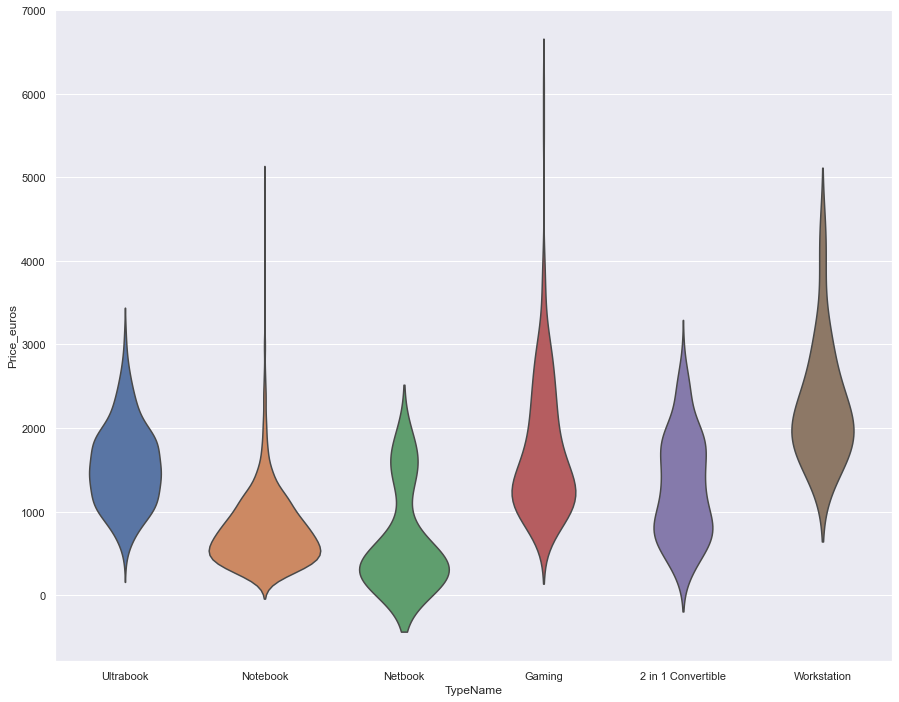

In [51]:
sns.violinplot(x = "TypeName", y = "Price_euros", inner = None, data = laptop)

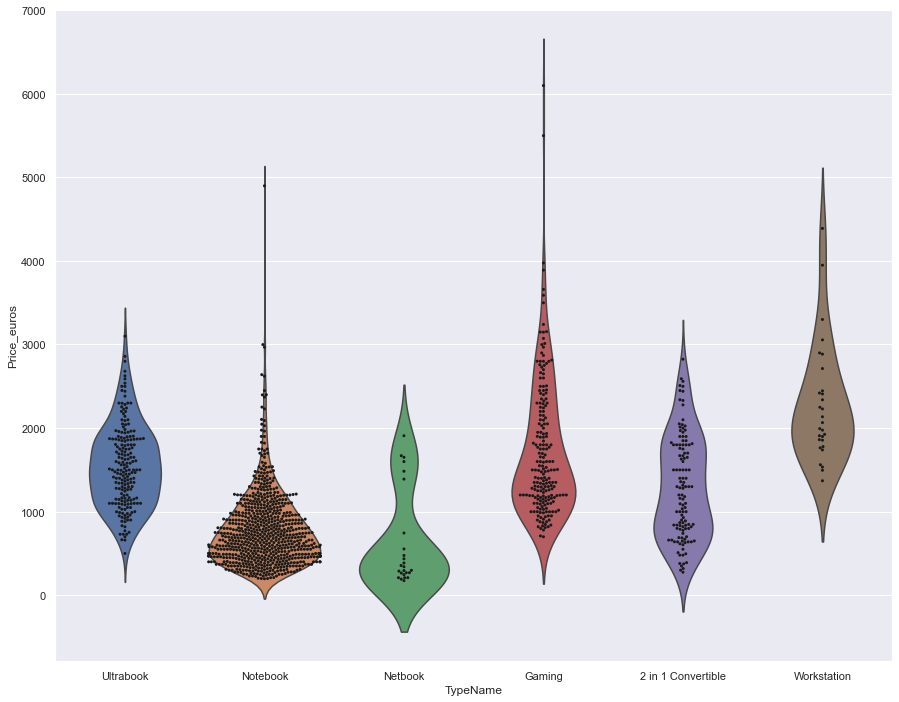

In [52]:
sns.violinplot(x = "TypeName", y = "Price_euros", inner = None, data = laptop)
sns.swarmplot(x = "TypeName", y = "Price_euros", color = "k", size = 3, data = laptop);

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

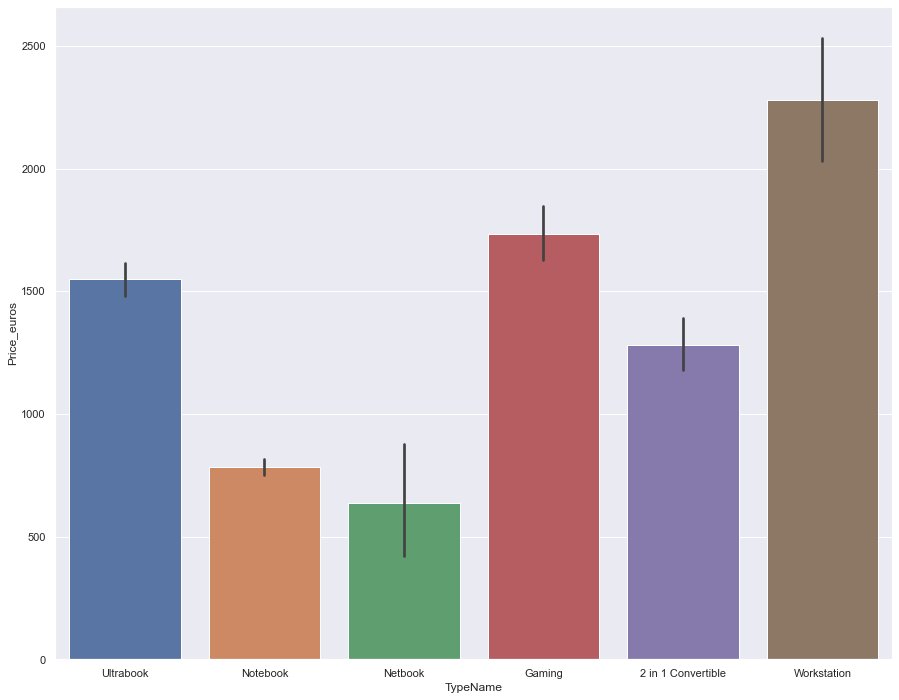

In [54]:
sns.barplot(x = "TypeName", y= "Price_euros", data = laptop)

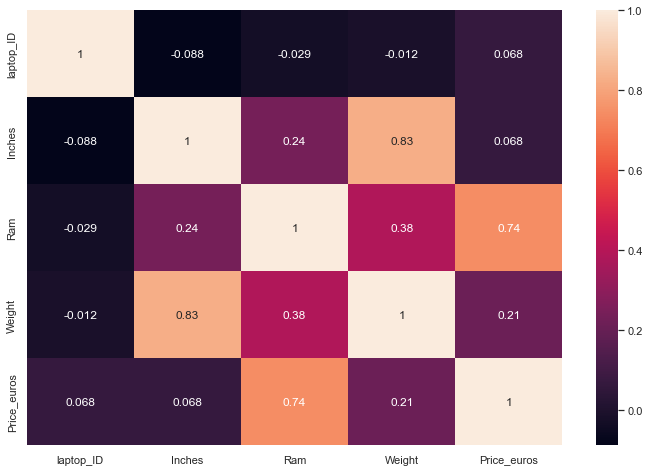

In [60]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(laptop.corr(), annot = True)
plt.show()

In [64]:
laptop.groupby('ScreenResolution')['Weight'].count()

ScreenResolution
1366x768     308
1440x900       4
1600x900      23
1920x1080    841
1920x1200      5
2160x1440      2
2256x1504      6
2304x1440      6
2400x1600      4
2560x1440     23
2560x1600      6
2736x1824      1
2880x1800      4
3200x1800     27
3840x2160     43
Name: Weight, dtype: int64

In [62]:
# The most preferred resolution is "1920x1080".

<AxesSubplot:xlabel='ScreenResolution', ylabel='Weight'>

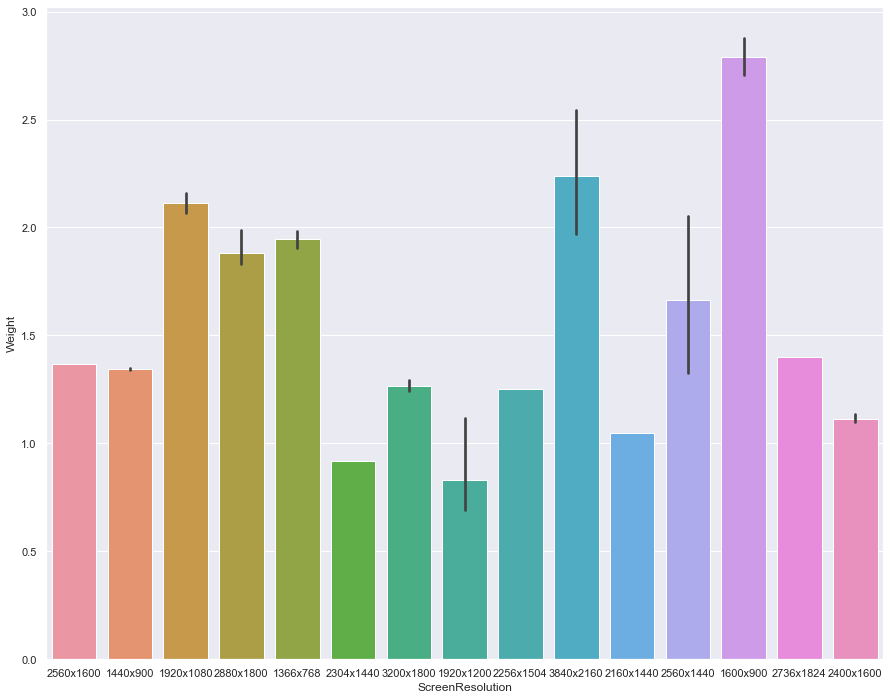

In [65]:
sns.barplot(x = "ScreenResolution", y= "Weight", data = laptop)

<AxesSubplot:xlabel='ScreenResolution', ylabel='Price_euros'>

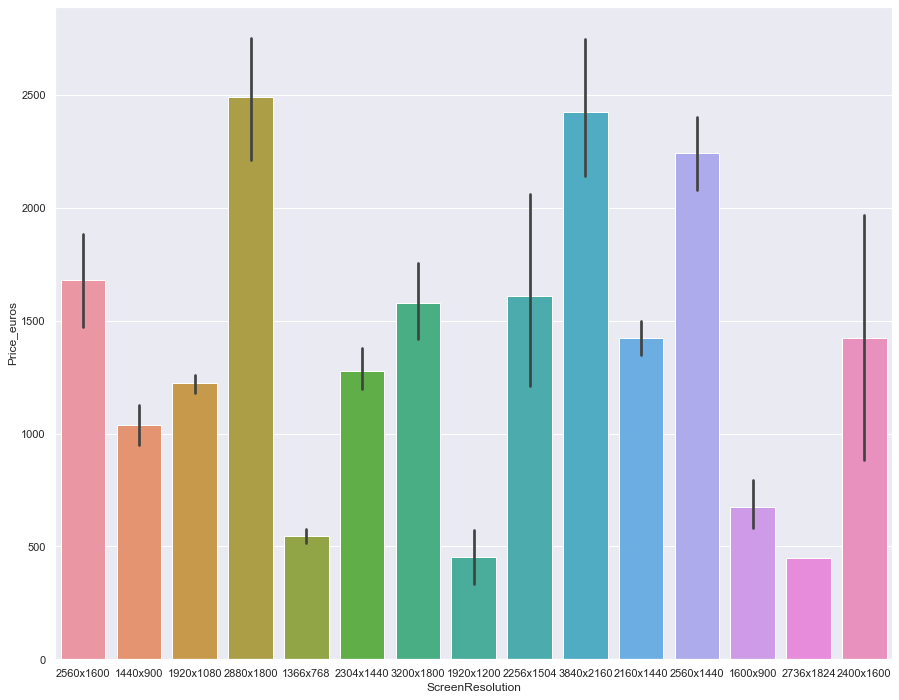

In [66]:
sns.barplot(x = "ScreenResolution", y= "Price_euros", data = laptop)

In [67]:
laptop.groupby('Company')['Weight'].count()

Company
Acer         103
Apple         21
Asus         158
Chuwi          3
Dell         297
Fujitsu        3
Google         3
HP           274
Huawei         2
LG             3
Lenovo       297
MSI           54
Mediacom       7
Microsoft      6
Razer          7
Samsung        9
Toshiba       48
Vero           4
Xiaomi         4
Name: Weight, dtype: int64

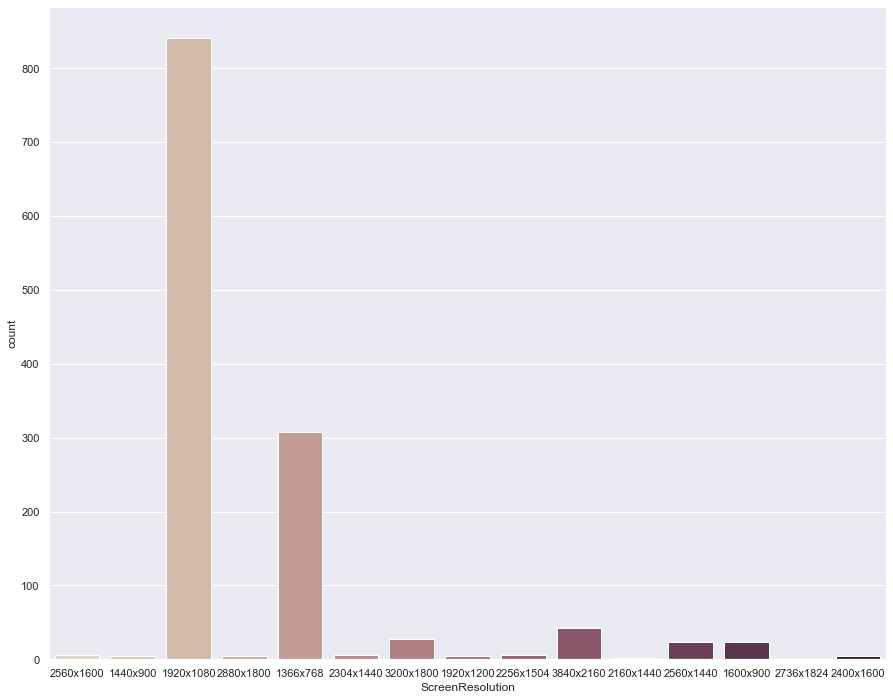

In [84]:
sns.countplot(x = "ScreenResolution", data = laptop, palette = "ch:.25");

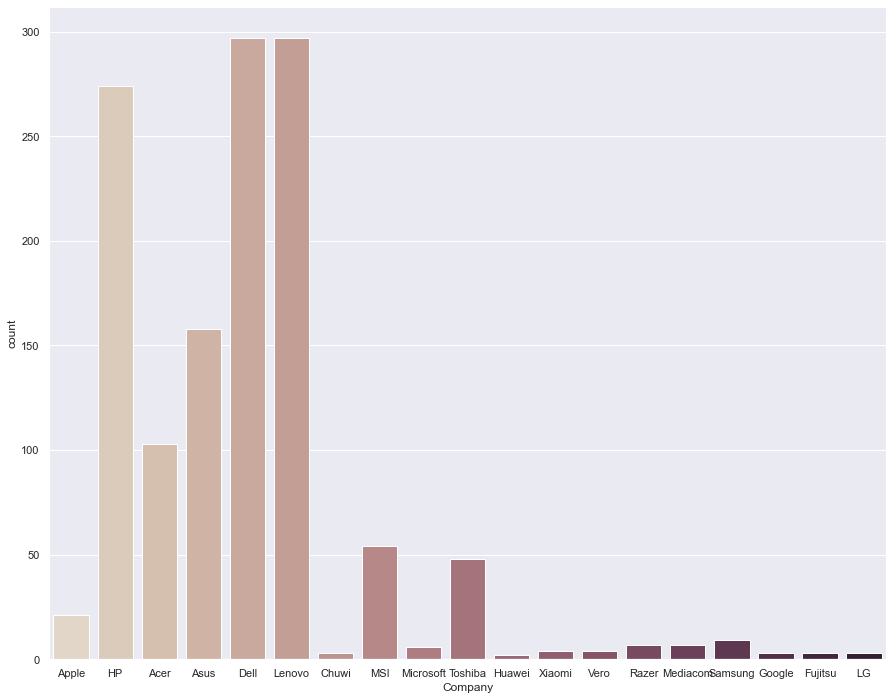

In [83]:
sns.countplot(x = "Company", data = laptop, palette = "ch:.25");

In [80]:
# Dell and Lenovo has the highest number of sales.

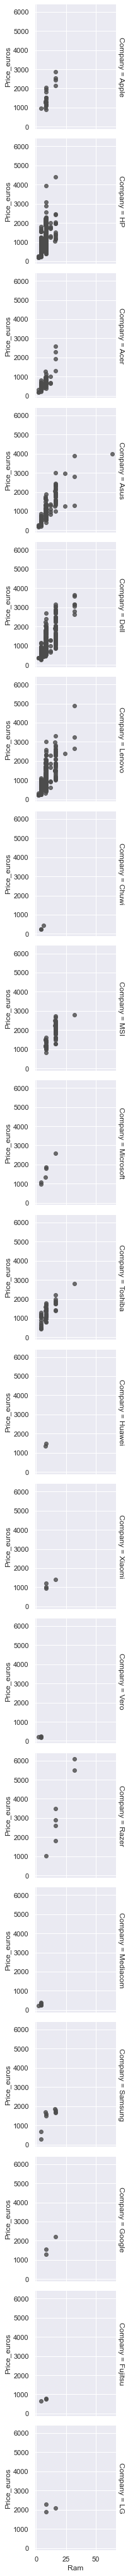

In [85]:
g = sns.FacetGrid(laptop, row="Company", margin_titles=True)
g.map(sns.regplot, "Ram", "Price_euros", color=".3", fit_reg=False, x_jitter=.1)

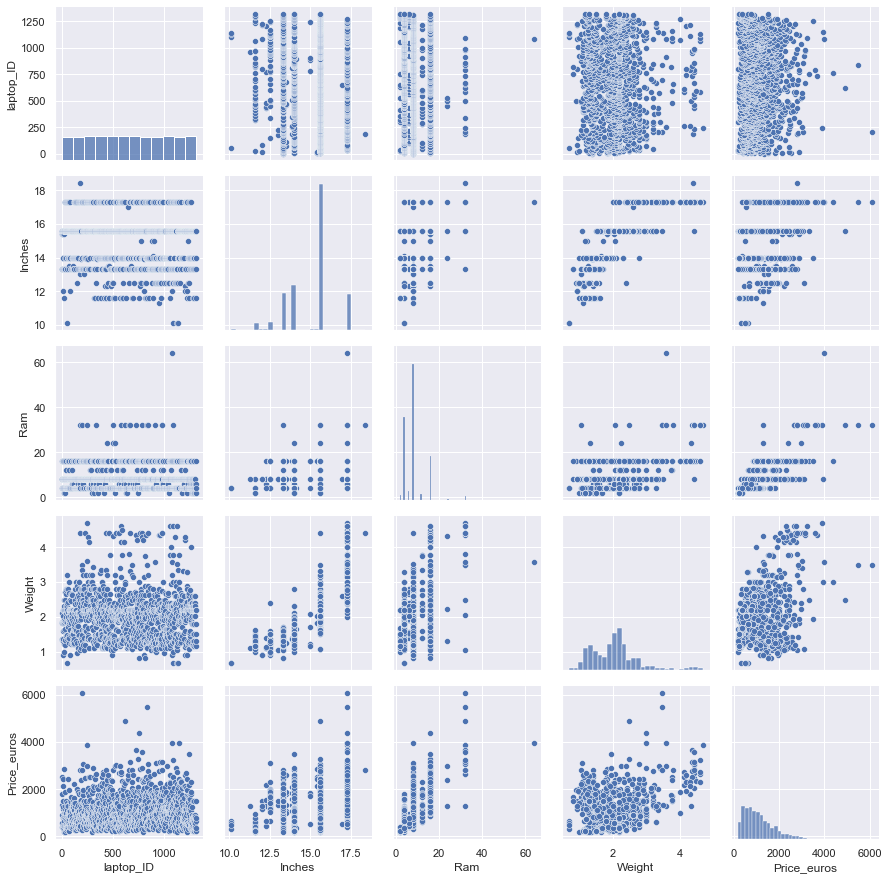

In [91]:
g = sns.PairGrid(laptop)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

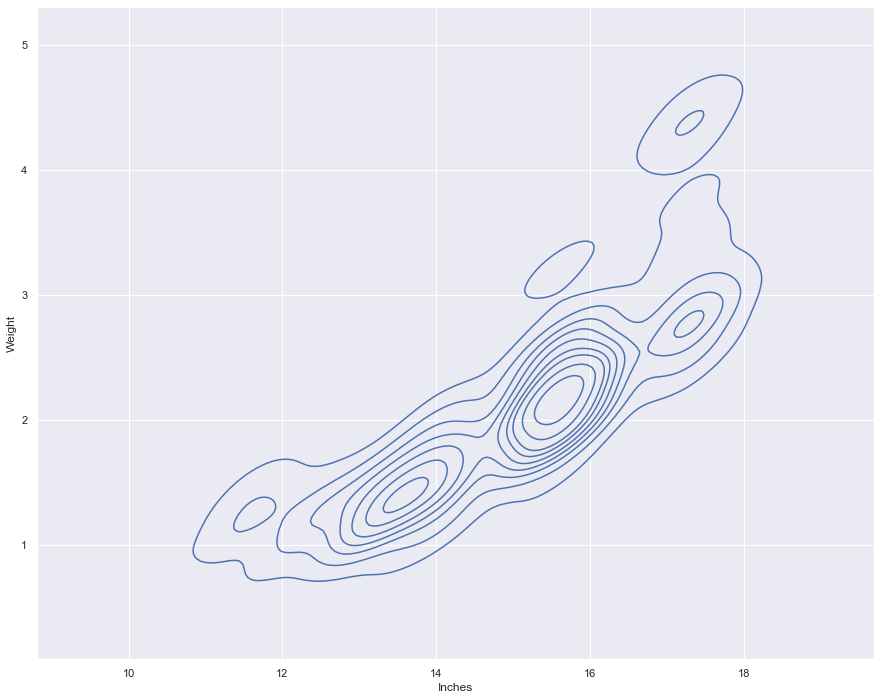

In [95]:
sns.kdeplot(x = "Inches", y = "Weight", gridsize = 200, data = laptop);

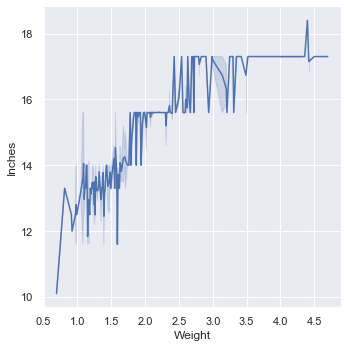

In [106]:
sns.relplot(x="Weight", y="Inches", kind="line", data=laptop);

In [102]:
sns.set_theme(color_codes=True)

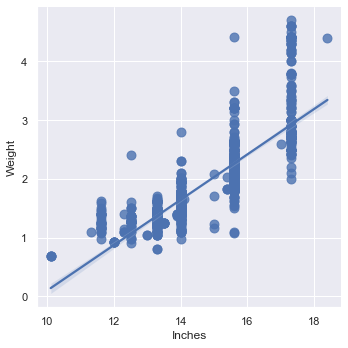

In [104]:
sns.lmplot(x="Inches", y="Weight", data=laptop, scatter_kws={"s": 80});

## Fitting a model

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [109]:
laptop.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
823,832,MSI,GL62M 7RD,Gaming,15.6,1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.40,1199.00
507,514,Acer,Aspire A515-51G-59QF,Notebook,15.6,1920x1080,Intel Core i5 8250U 1.6GHz,4,1TB HDD,Nvidia GeForce MX150,Windows 10,2.20,613.00
556,563,Mediacom,SmartBook 130,Notebook,13.3,1920x1080,Intel Atom x5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics,Windows 10,1.35,255.00
721,729,HP,Pavilion X360,2 in 1 Convertible,13.3,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,836.60
558,565,HP,15-bw007nv (A10-9620P/6GB/128GB/Radeon,Notebook,15.6,1920x1080,AMD A10-Series A10-9620P 2.5GHz,6,128GB SSD,AMD Radeon 530,Windows 10,1.91,568.90
1091,1106,HP,250 G6,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.86,345.99
118,121,Asus,X705UV-BX074T (i3-6006U/4GB/1TB/GeForce,Notebook,17.3,1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.00,564.00
1082,1097,Lenovo,Yoga Book,2 in 1 Convertible,10.1,1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,646.27
778,787,Razer,Blade Pro,Gaming,14.0,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,2899.00
462,469,Asus,Pro P2540UA-AB51,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,749.00


In [110]:
model_laptop = laptop[['Weight','Inches']]

In [111]:
model_laptop

,Weight,Inches
0,1.37,13.3
1,1.34,13.3
2,1.86,15.6
3,1.83,15.4
4,1.37,13.3
...,...,...
1298,1.80,14.0
1299,1.30,13.3
1300,1.50,14.0
1301,2.19,15.6


In [112]:
x = model_laptop.Weight
y = model_laptop.Inches

In [113]:
model = LinearRegression()

In [114]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [115]:
intercept_ = model.intercept_ 
print('intercept:', intercept_)

intercept: 11.400778841258987


In [ ]:
# This means for the 0 value of Weight, the value of Inches is 11.40077

In [117]:
model.coef_ = model.coef_ 
print('slope:', model.coef_)

slope: [1.77385221]


In [118]:
# This means a unit change in Weight, Inches change by 1.7738%. 

In [119]:
r_sq = model.score(np.array(x).reshape(-1,1),y)
r_sq

0.684973229731558

In [121]:
# The coefficient of determination is 0.684973229731558
# The accuracy of the model is judged by the r-squared value which is 68.49% here.

## Multiple Regression

In [137]:
X = laptop[['Inches', 'Weight', 'Ram']]
Y = laptop['Price_euros']

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=4)

In [139]:
model = LinearRegression()

In [140]:
model.fit(X_train, Y_train)

LinearRegression()

In [141]:
intercept_ = model.intercept_ 
print('intercept:', intercept_)

intercept: 1131.2027344819517


In [142]:
model.coef_ = model.coef_ 
print('slope:', model.coef_)

slope: [-66.87171463  24.63638142 112.82985857]


In [143]:
model.score(X_train, Y_train)

0.5846965271745009

In [144]:
model.predict(X_test)

array([ 591.05982148,  593.52345963,  589.5816386 ,  588.59618334,
        593.52345963,  593.52345963, 1963.70750131, 2132.61133459,
        591.05982148,  593.52345963, 1174.01145616,  694.35910768,
        945.94280789,  720.28309075,  833.41757097, 1037.69834331,
       1037.45197949,  609.97512815, 1035.97379661, 1944.03266911,
       1292.62064731, 2028.1155778 ,  950.87008418, 1039.91561764,
       1132.86762364, 1137.05580848,  688.20001233, 1057.16108463,
       1138.04126374, 1044.84289392, 1039.91561764, 2083.79487535,
       1131.14307694, 2028.36194161, 1039.42289001,  819.18317677,
        593.52345963, 1174.99691141,  729.83657247, 1145.92490579,
        681.79455316,  591.05982148,  944.71098882, 2036.49194748,
        461.30847611, 1154.54763929,  835.14211767,  816.71953863,
       1044.84289392, 1174.01145616,  686.47546563, 1892.92716303,
       1131.14307694, 1496.40869203, 1043.11834722, 2076.65032474,
       1949.94540065,  593.52345963,  591.05982148,  686.72182

In [147]:
Y_test.values

array([ 498.  ,  572.  ,  521.47,  349.  ,  575.  ,  369.  , 1849.  ,
       1650.  ,  621.45,  393.49,  729.  , 1205.  ,  849.  ,  859.  ,
        959.  ,  979.  , 1049.  ,  209.  , 1900.  , 1899.  ,  495.  ,
       2625.  , 2899.  , 1829.  , 2229.  , 1119.  , 1096.  , 1260.  ,
       1010.51,  647.  ,  769.  , 1197.  , 1750.  , 2450.  ,  895.01,
        579.  ,  499.  , 2013.1 ,  719.  , 1903.  ,  229.  ,  398.  ,
       1399.  , 1764.  ,  199.  , 1124.  ,  269.  ,  479.  , 1169.  ,
       1363.  ,  722.  , 2749.99, 1637.  , 1327.  ,  728.  , 1747.  ,
       1181.27,  498.9 ,  400.  ,  973.  ,  489.9 ,  759.  , 1179.  ,
        806.  , 1299.  , 2299.  ,  899.  ,  699.  ,  393.9 , 1285.  ,
       1030.99,  764.  ,  744.  , 1650.  ,  949.  ,  891.  , 2094.48,
        784.  ,  691.  ,  597.  ,  349.  , 2449.  , 2051.  ,  659.01,
       2199.  , 2229.  , 1460.  , 1518.55,  915.  , 1262.  ,  899.  ,
        569.  ,  813.  , 1449.  ,  380.  ,  800.  ,  379.  ,  825.  ,
        619.  ,  468

In [148]:
model.score(X_train, Y_train)

0.5846965271745009

## Q3) Bonus Question

In [149]:
import numpy as np
import statsmodels.api as api

results = api.OLS(Y, X).fit()
# Results
In [16]: print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Price_euros   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              3029.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:58:39   Log-Likelihood:                         -9860.7
No. Observations:                1303   AIC:                                  1.973e+04
Df Residuals:                    1300   BIC:                                  1.974e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Important Point: The adjusted R-squared for multiple regression is quite good.
# which has an accurac of 87.5%